In [121]:
import pandas as pd 
import numpy as np

In [122]:
"""
receive data from kaggle and convert to csv and save file to data repository 
"""
# !pip install datasets
# from datasets import load_dataset

# # Load the dataset from Hugging Face
# dataset = load_dataset("divaroffical/real_estate_ads")

# # Convert to Pandas DataFrame and save to CSV
# for split in dataset.keys():
#     df = dataset[split].to_pandas()
#     df.to_csv(f"../data/real_estate_ads_{split}.csv", index=False) 
#     print(f"Saved {split} data to real_estate_ads_{split}.csv")


'\nreceive data from kaggle and convert to csv and save file to data repository \n'

In [123]:
df = pd.read_csv(r"../data/real_estate_ads_train.csv")

C:\Users\SAJJAD\AppData\Local\Temp\ipykernel_33864\3362541588.py:1: DtypeWarning: Columns (26,28,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"../data/real_estate_ads_train.csv")


<h1> Handling Missing values</h1>

In [124]:
df.head()

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 60 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   cat2_slug                   1000000 non-null  object 
 1   cat3_slug                   999999 non-null   object 
 2   city_slug                   999998 non-null   object 
 3   neighborhood_slug           437139 non-null   object 
 4   created_at_month            1000000 non-null  object 
 5   user_type                   288882 non-null   object 
 6   description                 1000000 non-null  object 
 7   title                       999946 non-null   object 
 8   rent_mode                   352994 non-null   object 
 9   rent_value                  351322 non-null   float64
 10  rent_to_single              19 non-null       float64
 11  rent_type                   103961 non-null   object 
 12  price_mode                  573606 non-null   object 
 13

In [126]:
# ستون‌های float64
numeric_cols  = df.select_dtypes(include=['float64']).columns

# ستون‌های object
object_columns = df.select_dtypes(include=['object']).columns


In [127]:
"""test for all columns """
print("diff columns" , len(df.columns) - (len(numeric_cols ) + len(object_columns)))


diff columns 0


In [128]:
# df__ = df.isnull().sum().to_frame().reset_index().rename(columns={0: "counts"})
# df__[df__["counts"] > 0]
print("All Columns and Rows" , df.shape)
df.isnull().sum().to_frame().reset_index().rename(columns={0: "counts"}).where(lambda x: x["counts"] > 0).dropna()


All Columns and Rows (1000000, 60)


,index,counts
1,cat3_slug,1.0
2,city_slug,2.0
3,neighborhood_slug,562861.0
5,user_type,711118.0
7,title,54.0
8,rent_mode,647006.0
9,rent_value,648678.0
10,rent_to_single,999981.0
11,rent_type,896039.0
12,price_mode,426394.0


In [129]:
df["neighborhood_slug"].nunique()
set(df["neighborhood_slug"])
df.loc[df["neighborhood_slug"].isnull(),"neighborhood_slug"] = "Uncertain"
print(df["neighborhood_slug"].isnull().sum())

0


In [130]:
# handel null values 
set(df["user_type"])
df.loc[df["user_type"].isnull(),"user_type"] = "مشخص نشده"
print(df["user_type"].isnull().sum())


0


In [131]:

# handel null values 
set(df["title"])
df.loc[df["title"].isnull(),"title"] = "مشخص نشده"
print(df["title"].isnull().sum())

0


In [132]:
df[df["cat3_slug"].isnull()]

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
338801,commercial-rent,NaN,isfahan,khomeinishahr,2024-07-01 00:00:00,شخصی,از بانوان حرفه ای و دارای مشتری دعوت میشود به ...,اجاره صندلی در آکادمی زیبایی ( خمینی شهر),توافقی,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.692608,51.523163,NaN


In [133]:
handle_cat_3 = df[(df["cat2_slug"] == 'commercial-rent') & (df["city_slug"] == 'isfahan') & (df["neighborhood_slug"] == 'khomeinishahr' )]
df.loc[df["cat3_slug"].isnull() , "cat3_slug" ] = handle_cat_3["cat3_slug"].mode().values[0]
print(df["cat3_slug"].isnull().sum())

0


In [134]:
df = df.dropna(subset=['city_slug'])

# بررسی اینکه آیا ردیف‌ها درست حذف شدند
print(df['city_slug'].isnull().sum())  # باید 0 چاپ شود

0


In [135]:
df.loc[df["rent_mode"].isnull(), "rent_mode"] = "مشخص نشده"
# بررسی اینکه آیا ردیف‌ها درست حذف شدند
print(df['rent_mode'].isnull().sum())  # باید 0 چاپ شود

0


In [136]:
df[df["rent_value"] == 0 ] # chek for handle null values
df.loc[df["rent_value"].isnull(),"rent_value" ] = -1


In [137]:
# بررسی اینکه آیا ردیف‌ها درست حذف شدند
print(df['city_slug'].isnull().sum())  # باید 0 چاپ شود

0


In [138]:
print(df["rent_to_single"].nunique())
print(df["rent_to_single"].unique())
df.loc[df["rent_to_single"].isnull(),"rent_to_single" ] = -1
print(df["rent_to_single"].unique())

2
[nan  1.  0.]
[-1.  1.  0.]


In [139]:

print(df["rent_type"].nunique())
print(df["rent_type"].unique())
df.loc[df["rent_type"].isnull(),"rent_type" ] = "unknown"
print(df["rent_type"].unique())

2
[nan 'rent_credit' 'full_credit']
['unknown' 'rent_credit' 'full_credit']


In [140]:
print(df["price_mode"].nunique())
print(df["price_mode"].unique())
df.loc[df["price_mode"].isnull(),"price_mode" ] = "unknown"
print(df["price_mode"].unique())


3
[nan 'مقطوع' 'مجانی' 'توافقی']
['unknown' 'مقطوع' 'مجانی' 'توافقی']


In [141]:
print(df["price_value"].nunique())
print(df["price_value"].unique())
df.loc[df["price_value"].isnull(),"price_value" ] = -1
print(df["price_value"].unique())

12943
[           nan 8.50000000e+09 5.75000000e+09 ... 9.71100000e+09
 2.37300000e+09 1.24665822e+08]
[-1.00000000e+00  8.50000000e+09  5.75000000e+09 ...  9.71100000e+09
  2.37300000e+09  1.24665822e+08]


In [142]:
print(df["credit_mode"].nunique())
print(df["credit_mode"].unique())
df.loc[df["credit_mode"].isnull(),"credit_mode" ] = "unknown"
print(df["credit_mode"].unique())

3
[nan 'مقطوع' 'مجانی' 'توافقی']
['unknown' 'مقطوع' 'مجانی' 'توافقی']


In [143]:
print(df["credit_value"].nunique())
print(df["credit_value"].unique())
df.loc[df["credit_value"].isnull(),"credit_value" ] = -1
print(df["credit_value"].unique())

1421
[     nan 7.50e+08 9.50e+08 ... 3.10e+10 3.77e+08 2.68e+08]
[-1.00e+00  7.50e+08  9.50e+08 ...  3.10e+10  3.77e+08  2.68e+08]


In [144]:
print(df["rent_credit_transform"].nunique())
print(df["rent_credit_transform"].unique())
df.loc[df["rent_credit_transform"].isnull(),"rent_credit_transform" ] = "unknown"
print(df["rent_credit_transform"].unique())

2
[nan False True]
['unknown' False True]


In [145]:
print(df["transformable_price"].nunique())
print(df["transformable_price"].unique())
df.loc[df["transformable_price"].isnull(),"transformable_price" ] = "unknown"
print(df["transformable_price"].unique())

2
[nan False True]
['unknown' False True]


In [146]:
print(df["transformable_credit"].nunique())
print(df["transformable_credit"].unique())
df.loc[df["transformable_credit"].isnull(),"transformable_credit" ] = -1
print(df["transformable_credit"].unique())

1420
[     nan 7.50e+08 9.50e+08 ... 3.10e+10 3.77e+08 2.68e+08]
[-1.00e+00  7.50e+08  9.50e+08 ...  3.10e+10  3.77e+08  2.68e+08]


In [147]:
# ستون‌های float64
print('-' * 10, "numeric Columns", '-' * 10)
for col in numeric_cols :
    print(f"Before handling missing values, column '{col}' has {df[col].isnull().sum()} missing values.")
    df.loc[df[col].isnull(), col] = -1
    print(f"After handling, column '{col}' has {df[col].isnull().sum()} missing values.\n")
    print("-" * 30)

# ستون‌های object
print('-' * 10, "Object Columns", '-' * 10)
for col in object_columns:
    print(f"Before handling missing values, column '{col}' has {df[col].isnull().sum()} missing values.")
    df.loc[df[col].isnull(), col] = "Unknown"
    print(f"After handling, column '{col}' has {df[col].isnull().sum()} missing values.\n")
    print("-" * 30)


---------- numeric Columns ----------
Before handling missing values, column 'rent_value' has 0 missing values.
After handling, column 'rent_value' has 0 missing values.

------------------------------
Before handling missing values, column 'rent_to_single' has 0 missing values.
After handling, column 'rent_to_single' has 0 missing values.

------------------------------
Before handling missing values, column 'price_value' has 0 missing values.
After handling, column 'price_value' has 0 missing values.

------------------------------
Before handling missing values, column 'credit_value' has 0 missing values.
After handling, column 'credit_value' has 0 missing values.

------------------------------
Before handling missing values, column 'transformable_credit' has 0 missing values.
After handling, column 'transformable_credit' has 0 missing values.

------------------------------
Before handling missing values, column 'transformed_credit' has 927589 missing values.
After handling, colum

In [148]:
df.isnull().sum().to_frame().reset_index().rename(columns={0: "counts"}).where(lambda x: x["counts"] > 0).dropna()

,index,counts


🎯 هدف
محاسبه آمارهای توصیفی از جمله:

میانگین (mean)

میانه (median)

انحراف معیار (std)

کمینه و بیشینه (min, max)

چارک‌ها (25%, 75%)

بررسی وجود مقادیر گمشده

In [150]:

# فرض: df دیتافریم شماست که شامل ستون‌های بالا هست
desc_stats = df[numeric_cols].describe().T

# اضافه کردن میانه و تعداد مقادیر گمشده
desc_stats['median'] = df[numeric_cols].median()
desc_stats['missing'] = df[numeric_cols].isna().sum()

# مرتب‌سازی برای مشاهده بهتر
desc_stats = desc_stats[['count', 'missing', 'mean', 'std', 'min', '25%', 'median', '75%', 'max']]

# نمایش

desc_stats

,count,missing,mean,std,min,25%,median,75%,max
rent_value,999998.0,0,1.441231e+10,2.256903e+12,-1.0,-1.0,-1.000000e+00,1.000000e+06,1.000000e+15
rent_to_single,999998.0,0,-9.999630e-01,8.543936e-03,-1.0,-1.0,-1.000000e+00,-1.000000e+00,1.000000e+00
price_value,999998.0,0,9.869532e+09,4.432744e+11,-1.0,-1.0,7.800000e+08,3.300000e+09,1.000000e+14
credit_value,999998.0,0,1.715440e+10,2.576155e+12,-1.0,-1.0,-1.000000e+00,1.000000e+08,1.000000e+15
transformable_credit,999998.0,0,1.715440e+10,2.576155e+12,-1.0,-1.0,-1.000000e+00,1.000000e+08,1.000000e+15
transformed_credit,999998.0,0,6.196069e+08,5.555566e+11,-1.0,-1.0,-1.000000e+00,-1.000000e+00,5.555556e+14
transformable_rent,999998.0,0,1.441231e+10,2.256903e+12,-1.0,-1.0,-1.000000e+00,1.000000e+06,1.000000e+15
transformed_rent,999998.0,0,1.172979e+06,1.465493e+07,-1.0,-1.0,-1.000000e+00,-1.000000e+00,3.000000e+09
land_size,999998.0,0,7.756155e+02,5.265041e+04,-1.0,-1.0,-1.000000e+00,-1.000000e+00,1.000000e+07
building_size,999998.0,0,4.353573e+03,1.353666e+05,-1.0,73.0,1.000000e+02,1.620000e+02,1.000000e+07


In [151]:
object_columns

Index(['cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug',
       'created_at_month', 'user_type', 'description', 'title', 'rent_mode',
       'rent_type', 'price_mode', 'credit_mode', 'rent_credit_transform',
       'transformable_price', 'deed_type', 'has_business_deed', 'floor',
       'rooms_count', 'total_floors_count', 'unit_per_floor', 'has_balcony',
       'has_elevator', 'has_warehouse', 'has_parking', 'construction_year',
       'is_rebuilt', 'has_water', 'has_warm_water_provider', 'has_electricity',
       'has_gas', 'has_heating_system', 'has_cooling_system', 'has_restroom',
       'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool',
       'has_jacuzzi', 'has_sauna', 'floor_material', 'property_type',
       'extra_person_capacity'],
      dtype='object')

✅ تحلیل آماری پیشنهادی برای ستون‌های object:
برای هر ستون:

تعداد مقادیر غیرخالی (non-null)

تعداد یکتاها (nunique)

مقدار پرتکرار (mode)

تعداد تکرار پرتکرارترین مقدار

تعداد مقادیر گمشده (missing)

In [154]:

# تابع برای تحلیل هر ستون
def summarize_object_column(df, col):
    data = df[col]
    return pd.Series({
        'non_null': data.notna().sum(),
        'missing': data.isna().sum(),
        'unique': data.nunique(),
        'mode': data.mode().iloc[0] if not data.mode().empty else None,
        'mode_freq': data.value_counts().iloc[0] if not data.value_counts().empty else 0
    })

# ساخت جدول خلاصه
object_summary = pd.DataFrame({col: summarize_object_column(df, col) for col in object_columns}).T

# نمایش
object_summary_ = object_summary.sort_values(by='missing', ascending=False)
object_summary_


In [155]:
object_summary_

,non_null,missing,unique,mode,mode_freq
cat2_slug,999998,0,6,residential-sell,558707
has_cooling_system,999998,0,7,Unknown,649380
has_parking,999998,0,3,True,552541
construction_year,999998,0,35,Unknown,184172
is_rebuilt,999998,0,3,Unknown,470529
has_water,999998,0,3,Unknown,966554
has_warm_water_provider,999998,0,5,Unknown,620498
has_electricity,999998,0,3,Unknown,966553
has_gas,999998,0,3,Unknown,966568
has_heating_system,999998,0,9,Unknown,631030


In [156]:
df

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,مشخص نشده,-1.0,...,Unknown,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,مشخص نشده,-1.0,...,Unknown,-1.0,Unknown,-1.0,-1.0,-1.000000e+00,-1.0,-1.000000,-1.000000,500.0
2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,مشخص نشده,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,...,Unknown,-1.0,Unknown,-1.0,-1.0,-1.000000e+00,-1.0,35.703865,51.373459,-1.0
3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,مشخص نشده,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,...,Unknown,-1.0,Unknown,-1.0,-1.0,-1.000000e+00,-1.0,-1.000000,-1.000000,-1.0
4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,مشخص نشده,-1.0,...,Unknown,-1.0,Unknown,-1.0,-1.0,-1.000000e+00,-1.0,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,residential-sell,apartment-sell,kermanshah,Uncertain,2024-07-01 00:00:00,مشاور املاک,~~~مشاورین املاک قبادی~~~\n■جنوبی تک واحدی\n■د...,آپارتمان ۱۸۰ متری وحدت غربی,مشخص نشده,-1.0,...,Unknown,-1.0,Unknown,-1.0,-1.0,-1.000000e+00,-1.0,34.350235,47.083241,500.0
999996,residential-rent,apartment-rent,tehran,darya,2024-07-01 00:00:00,مشاور املاک,نوساز \n\n تک واحدی\n\nشخصی ساز\n\nروف گا...,آپارتمان ۱۱۰ متری سعادت آباد دریا,مقطوع,45000000.0,...,Unknown,-1.0,Unknown,-1.0,-1.0,-1.000000e+00,-1.0,35.770454,51.369099,500.0
999997,residential-sell,house-villa-sell,yazd,Uncertain,2024-11-01 00:00:00,مشخص نشده,سلام ودرود\nفروش منزل مسکونی واقع در خیابان ان...,منزل فروشی. خیابان انقلاب نرسیده به کارخانه...,مشخص نشده,-1.0,...,Unknown,-1.0,Unknown,-1.0,-1.0,-1.000000e+00,-1.0,-1.000000,-1.000000,-1.0
999998,temporary-rent,suite-apartment,bandar-anzali,Uncertain,2024-09-01 00:00:00,مشخص نشده,سویت بدون خواب (روبه دریا و معمولی)\nسویت ۱خوا...,مجتمع ویلایی کنار ساحل پاسداران,مشخص نشده,-1.0,...,Unknown,5.0,5.0,-1.0,3000000.0,-1.000000e+00,-1.0,37.483501,49.438721,-1.0


In [164]:
import plotly.offline as pyo
import plotly.graph_objs as go

Count_Values_cat_2 = df.groupby(["cat2_slug"]).size().reset_index().rename(columns = {0:"Count_Values"})
pull_values = [0.1] * len(Count_Values_cat_2)

fig = go.Figure(data=[go.Pie(labels=Count_Values_cat_2['cat2_slug'],
                             values=Count_Values_cat_2['Count_Values'],
                             pull=pull_values)])

pyo.plot(fig)  # این خط جایگزین fig.show() میشه

'temp-plot.html'

In [165]:
Count_Values_cat_2 = df.groupby(["cat3_slug"]).size().reset_index().rename(columns = {0:"Count_Values"})
pull_values = [0.1] * len(Count_Values_cat_2)

fig = go.Figure(data=[go.Pie(labels=Count_Values_cat_2['cat3_slug'],
                             values=Count_Values_cat_2['Count_Values'],
                             pull=pull_values)])

pyo.plot(fig)  # این خط جایگزین fig.show() میشه

'temp-plot.html'

C:\Users\SAJJAD\AppData\Local\Temp\ipykernel_33864\3727542217.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




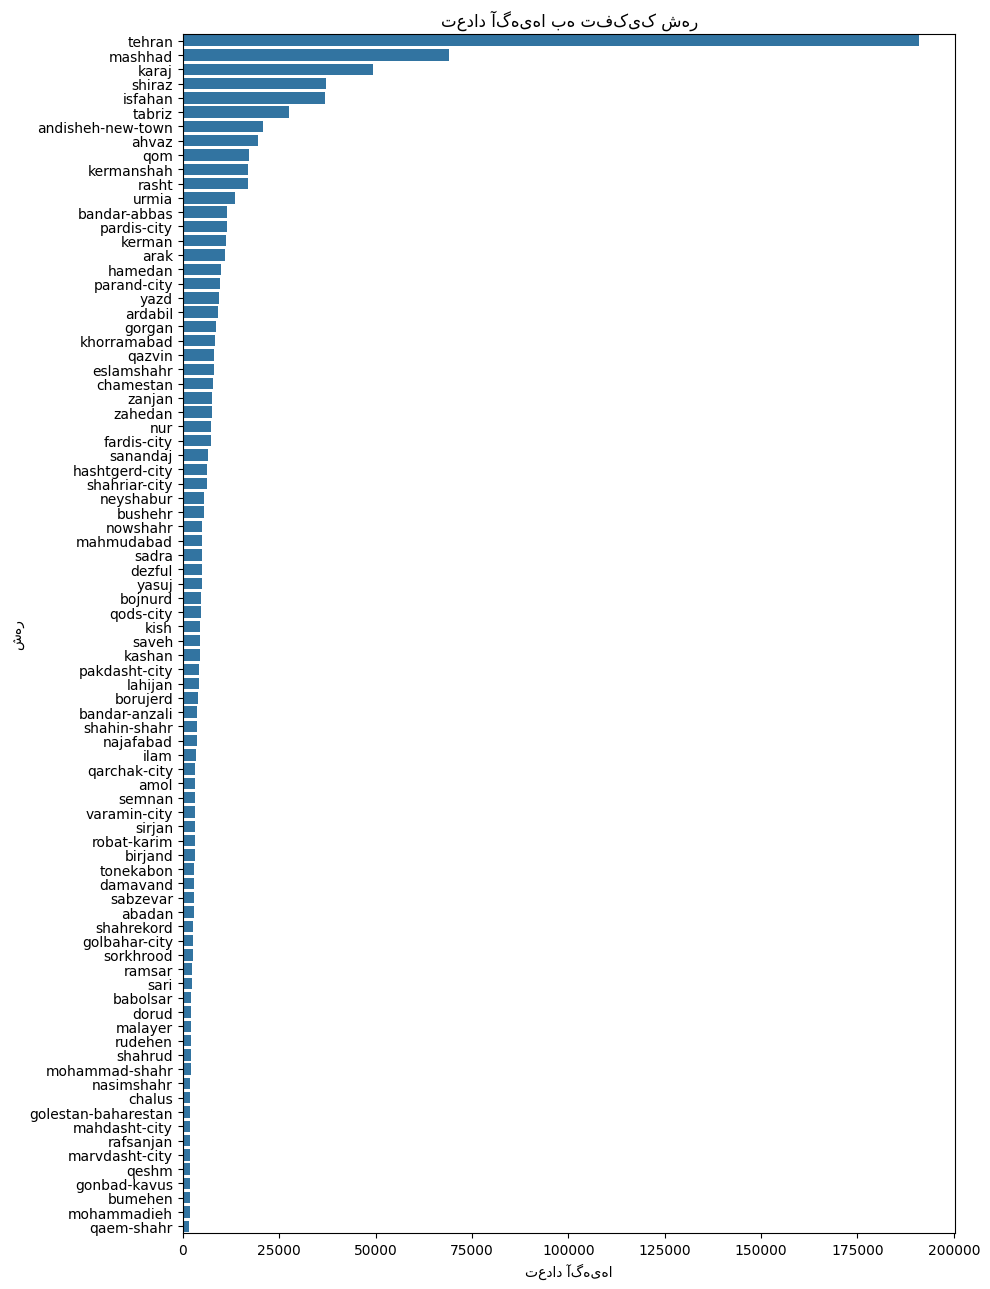

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

size_of_city = df.groupby('city_slug').size().reset_index().rename(columns={0: "Count_Values"})
size_city = size_of_city.sort_values(by='Count_Values', ascending=False).head(int(len(size_of_city)*.20))

plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Count_Values', y='city_slug', data=size_city, ci=None)

plt.xlabel('تعداد آگهی‌ها')
plt.ylabel('شهر')
plt.title('تعداد آگهی‌ها به تفکیک شهر')
plt.tight_layout()
plt.show()


In [ ]:
df["created_at_month"].nunique()
# todo : add weekly and day name this date 

46

In [181]:
Count_Values_cat_2 = df.groupby(["user_type"]).size().reset_index().rename(columns = {0:"Count_Values"})
pull_values = [0.1] * len(Count_Values_cat_2)

fig = go.Figure(data=[go.Pie(labels=Count_Values_cat_2['user_type'],
                             values=Count_Values_cat_2['Count_Values'],
                             pull=pull_values)])

pyo.plot(fig)  # این خط جایگزین fig.show() میشه

'temp-plot.html'

In [182]:
Count_Values_cat_2 = df.groupby(["rent_mode"]).size().reset_index().rename(columns = {0:"Count_Values"})
pull_values = [0.1] * len(Count_Values_cat_2)

fig = go.Figure(data=[go.Pie(labels=Count_Values_cat_2['rent_mode'],
                             values=Count_Values_cat_2['Count_Values'],
                             pull=pull_values)])

pyo.plot(fig)  # این خط جایگزین fig.show() میشه

'temp-plot.html'

In [185]:
Count_Values_cat_2 = df.groupby(["property_type"]).size().reset_index().rename(columns = {0:"Count_Values"})
pull_values = [0.1] * len(Count_Values_cat_2)

fig = go.Figure(data=[go.Pie(labels=Count_Values_cat_2['property_type'],
                             values=Count_Values_cat_2['Count_Values'],
                             pull=pull_values)])

pyo.plot(fig)  # این خط جایگزین fig.show() میشه

'temp-plot.html'

In [184]:
df["property_type"].nunique()

6

In [186]:
df.columns

Index(['cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug',
       'created_at_month', 'user_type', 'description', 'title', 'rent_mode',
       'rent_value', 'rent_to_single', 'rent_type', 'price_mode',
       'price_value', 'credit_mode', 'credit_value', 'rent_credit_transform',
       'transformable_price', 'transformable_credit', 'transformed_credit',
       'transformable_rent', 'transformed_rent', 'land_size', 'building_size',
       'deed_type', 'has_business_deed', 'floor', 'rooms_count',
       'total_floors_count', 'unit_per_floor', 'has_balcony', 'has_elevator',
       'has_warehouse', 'has_parking', 'construction_year', 'is_rebuilt',
       'has_water', 'has_warm_water_provider', 'has_electricity', 'has_gas',
       'has_heating_system', 'has_cooling_system', 'has_restroom',
       'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool',
       'has_jacuzzi', 'has_sauna', 'floor_material', 'property_type',
       'regular_person_capacity', 'extra_person

In [ ]:
import plotly.express as px

df_location = df[['location_latitude', 'location_longitude']].dropna()

fig = px.scatter_mapbox(df_location,
                        lat="location_latitude",
                        lon="location_longitude",
                        zoom=5,
                        height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="نقشه موقعیت مکانی آگهی‌ها")

# ذخیره خروجی
fig.write_html("map_output.html")


In [196]:
import plotly.express as px

# فیلتر موقعیت‌هایی که مقدار نال ندارن
df_location = df[['location_latitude', 'location_longitude']].dropna()

# استفاده از تابع جدید scatter_map
fig = px.scatter_map(df_location,
                     lat="location_latitude",
                     lon="location_longitude",
                     zoom=5,
                     height=600)

fig.update_layout(title="نقشه موقعیت مکانی آگهی‌ها")

# ذخیره خروجی
fig.write_html("map_output.html")


In [200]:
df['rent_value'].describe()


count    9.999980e+05
mean     1.441231e+10
std      2.256903e+12
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%      1.000000e+06
max      1.000000e+15
Name: rent_value, dtype: float64

📉 ۳. توزیع rent_value


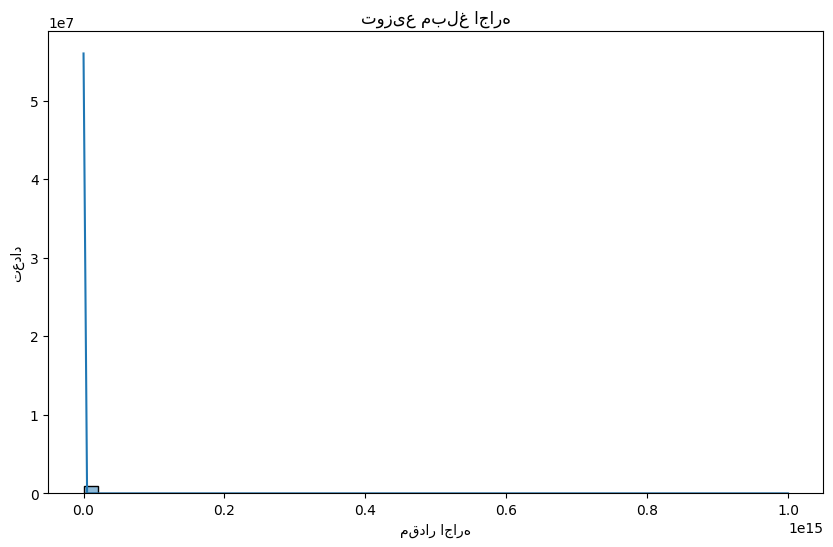

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['rent_value'], kde=True, bins=50)
plt.title("توزیع مبلغ اجاره")
plt.xlabel("مقدار اجاره")
plt.ylabel("تعداد")
plt.show()


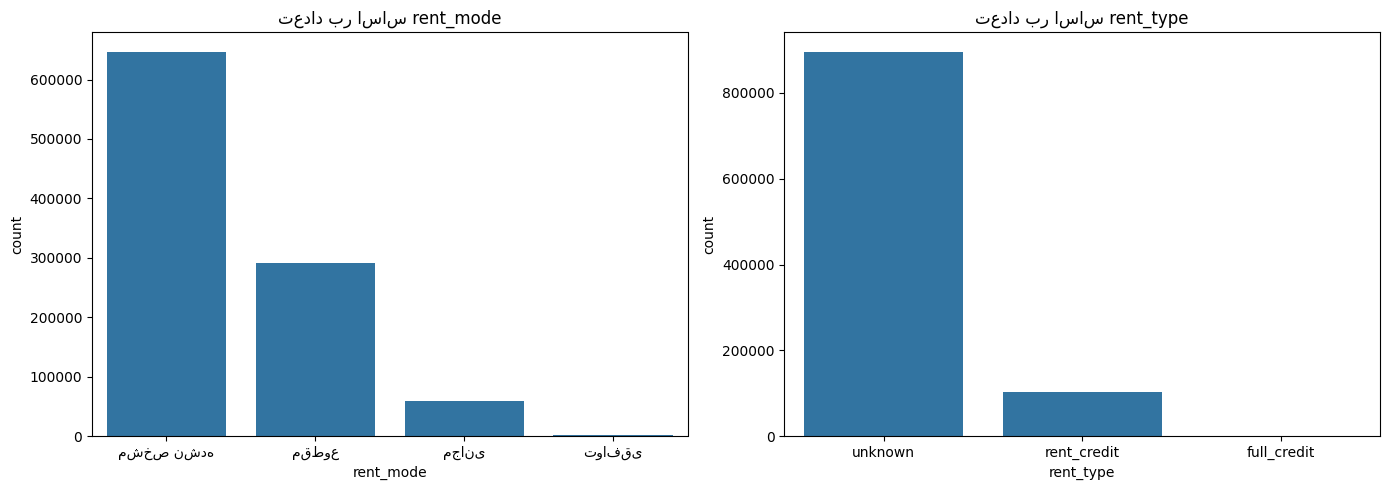

In [ ]:
#🧱  نمودار ستون‌ برای rent_mode و rent_type

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='rent_mode', ax=ax[0])
ax[0].set_title('تعداد بر اساس rent_mode')

sns.countplot(data=df, x='rent_type', ax=ax[1])
ax[1].set_title('تعداد بر اساس rent_type')

plt.tight_layout()
plt.show()


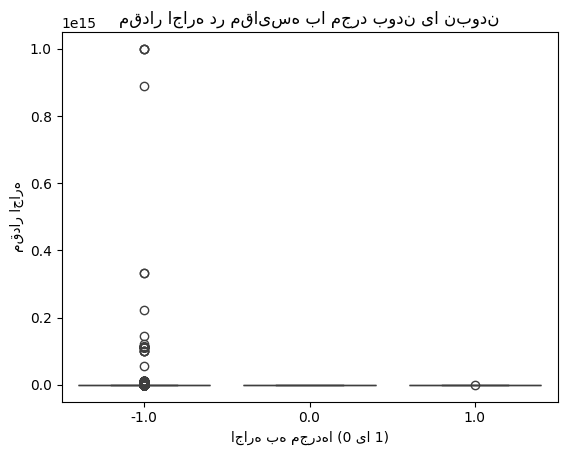

In [204]:
#👤 ارتباط با rent_to_single
sns.boxplot(data=df, x='rent_to_single', y='rent_value')
plt.title("مقدار اجاره در مقایسه با مجرد بودن یا نبودن")
plt.xlabel("اجاره به مجردها (0 یا 1)")
plt.ylabel("مقدار اجاره")
plt.show()


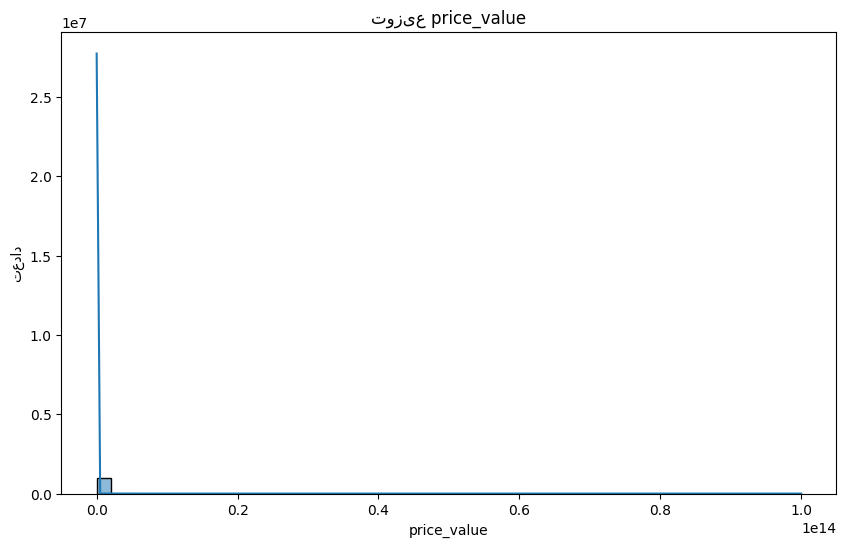

In [205]:
#📈 توزیع قیمت (price_value)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['price_value'], kde=True, bins=50)
plt.title("توزیع price_value")
plt.xlabel("price_value")
plt.ylabel("تعداد")
plt.show()


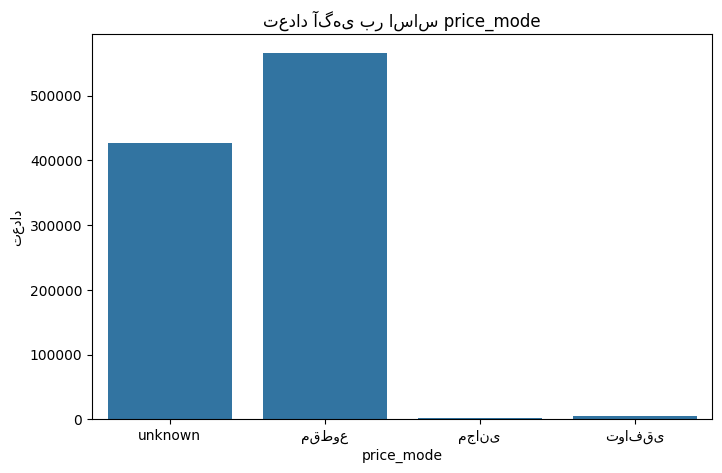

In [206]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='price_mode')
plt.title("تعداد آگهی بر اساس price_mode")
plt.xlabel("price_mode")
plt.ylabel("تعداد")
plt.show()


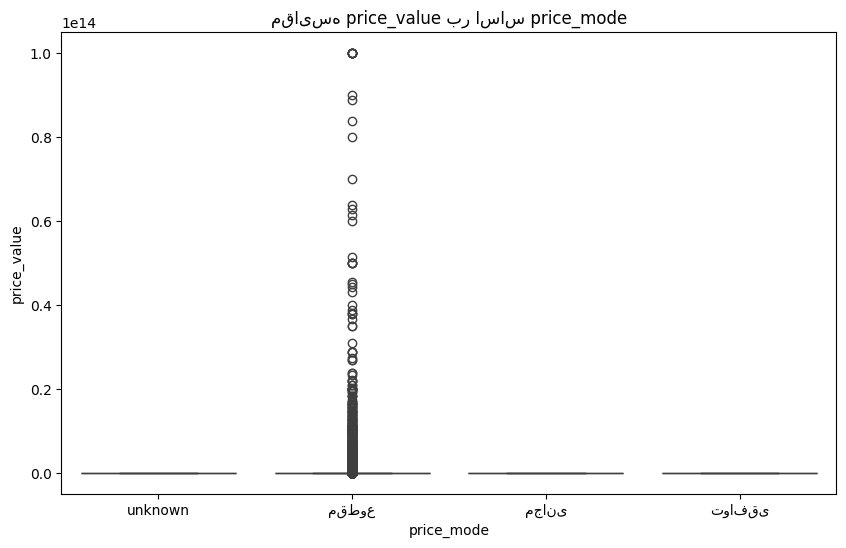

In [207]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price_mode', y='price_value')
plt.title("مقایسه price_value بر اساس price_mode")
plt.xlabel("price_mode")
plt.ylabel("price_value")
plt.show()


<Axes: xlabel='credit_mode', ylabel='credit_value'>

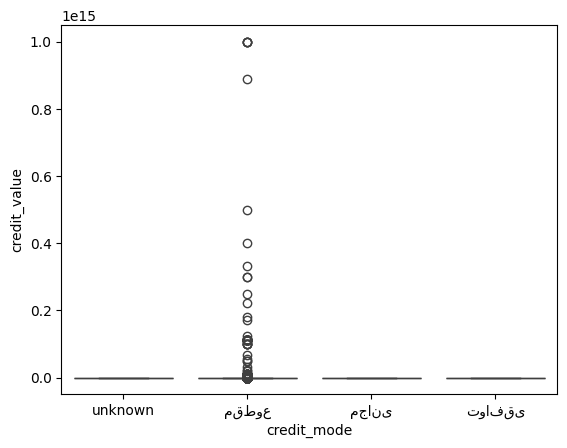

In [208]:
df['credit_value'].describe()
sns.boxplot(data=df, x='credit_mode', y='credit_value')


<Axes: xlabel='transformed_credit', ylabel='transformed_rent'>

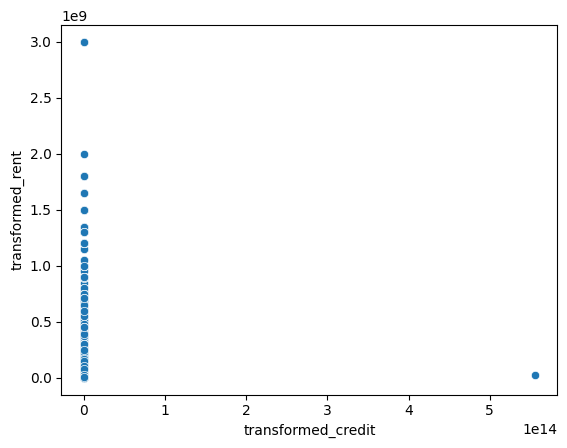

In [209]:
df[['transformed_rent', 'transformed_credit']].describe()
sns.scatterplot(x='transformed_credit', y='transformed_rent', data=df)
